# LIBRARY

In [ ]:
install.packages('ggplot2')
library('ggplot2')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# 1. Linear Regression (predict Sales on Youtube)

## a. Load data

In [ ]:
# https://drive.google.com/file/d/1LWG8ujUG2c-tyefPyuj7frCB6-_FsFXM/view?usp=drive_link

system ('gdown --id 1LWG8ujUG2c-tyefPyuj7frCB6-_FsFXM')

In [ ]:
data = read.csv('marketing.csv')

## b. Overview

In [ ]:
head(data)

,youtube,facebook,newspaper,sales
,<dbl>,<dbl>,<dbl>,<dbl>
1,276.12,45.36,83.04,26.52
2,53.40,47.16,54.12,12.48
3,20.64,55.08,83.16,11.16
4,181.80,49.56,70.20,22.20
5,216.96,12.96,70.08,15.48
6,10.44,58.68,90.00,8.64


In [ ]:
# so dong, so cot
print(paste('Số dòng:', dim(data)[1],'&','Số cột:', dim(data)[2]))

[1] "Số dòng: 200 & Số cột: 4"


In [ ]:
str(data)

'data.frame':	200 obs. of  4 variables:
 $ youtube  : num  276.1 53.4 20.6 181.8 217 ...
 $ facebook : num  45.4 47.2 55.1 49.6 13 ...
 $ newspaper: num  83 54.1 83.2 70.2 70.1 ...
 $ sales    : num  26.5 12.5 11.2 22.2 15.5 ...


In [ ]:
summary(data)

    youtube          facebook       newspaper          sales      
 Min.   :  0.84   Min.   : 0.00   Min.   :  0.36   Min.   : 1.92  
 1st Qu.: 89.25   1st Qu.:11.97   1st Qu.: 15.30   1st Qu.:12.45  
 Median :179.70   Median :27.48   Median : 30.90   Median :15.48  
 Mean   :176.45   Mean   :27.92   Mean   : 36.66   Mean   :16.83  
 3rd Qu.:262.59   3rd Qu.:43.83   3rd Qu.: 54.12   3rd Qu.:20.88  
 Max.   :355.68   Max.   :59.52   Max.   :136.80   Max.   :32.40  

In [ ]:
# check xem có NA data không
sprintf("Total NA of data = %d", sum(is.na(data)))

[1] "Total NA of data = 0"

## c. Define relationship between Sales and Youtube

In [ ]:
data_1 = data[,c('youtube', 'sales')]

`geom_smooth()` using formula = 'y ~ x'


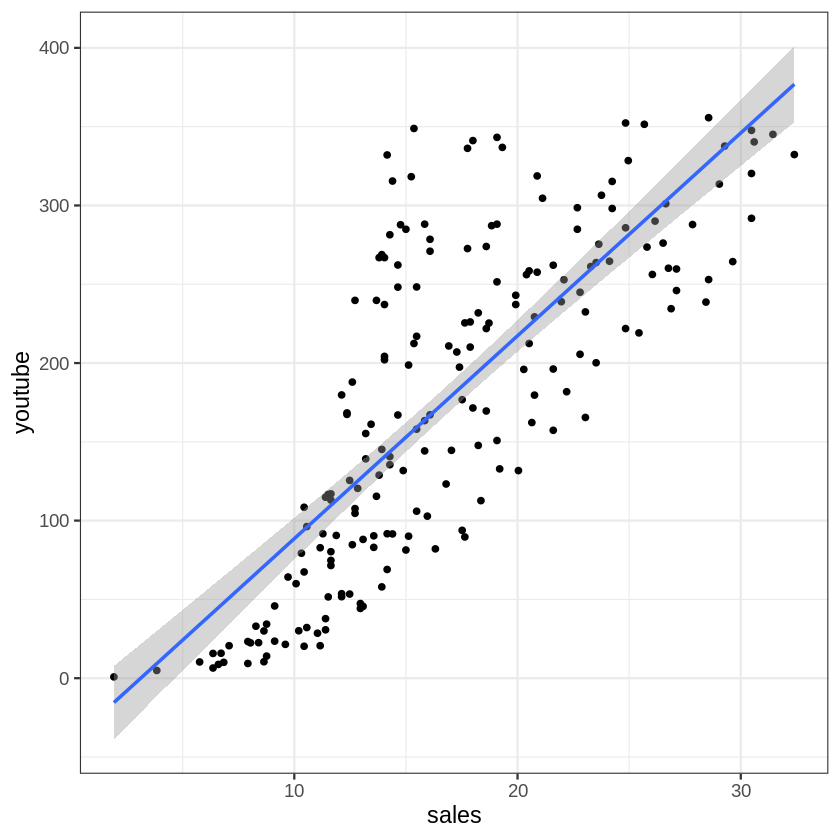

In [ ]:
plot = ggplot(data = data_1, aes(x = sales, y = youtube)) +
  geom_point() + geom_smooth(method = 'lm') +
  theme_bw(base_size = 14)
plot

In [ ]:
# Tính correlation
print(cor(data_1$youtube, data_1$sales))

[1] 0.7822244


Nhận xét: Có mối quan hệ tuyến tính giữa data Sales & Youtube. Số lượng sales tăng khi marketing ở youtube tăng.
Hệ số tương quan là 0.78 khá cao cũng làm rõ hơn mối quan hệ tương quan thuận mạnh này.

## d. Data preprocessing

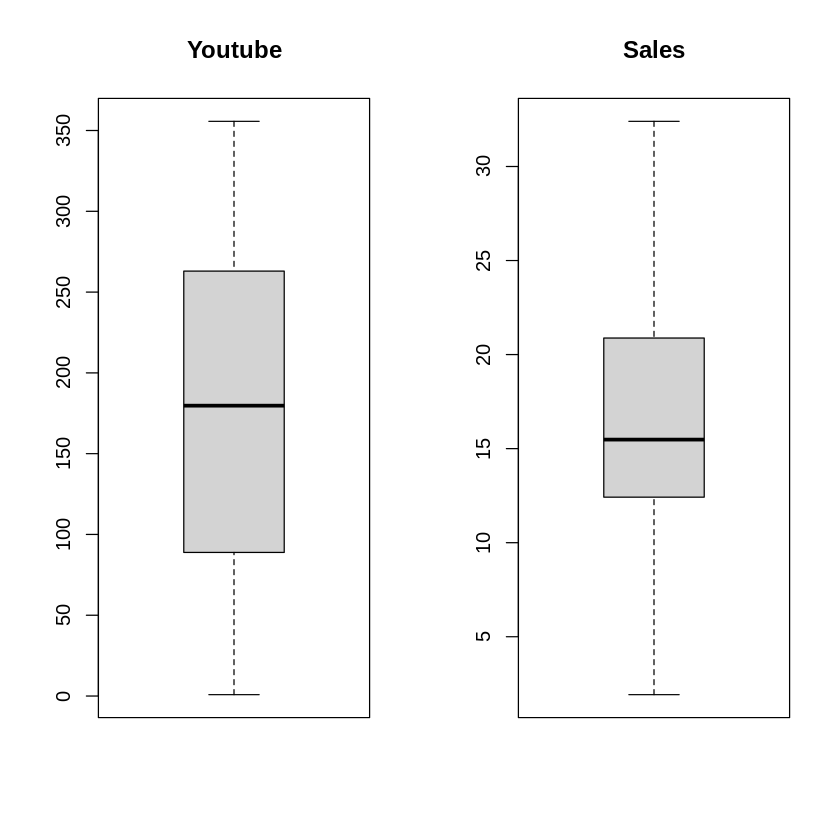

In [ ]:
# Check outlier

par(mfrow = c(1,2)) # vẽ 1 dòng 2 cột
boxplot(data_1$youtube, main = "Youtube")
boxplot(data_1$sales, main = "Sales")

In [ ]:
# check xem có NA data không
sprintf("Total NA of data = %d", sum(is.na(data_1)))

[1] "Total NA of data = 0"

Nhận xét: Có thể thấy data Youtube & Sales không có outliers & không có missing value --> Phù hợp với model Linear Regression

## f. Create Train/test set

In [ ]:
set.seed(42)
trainingRowIndex <- sample(1:nrow(data_1), 0.7*nrow(data_1))
print('Selected trainning row indexes:')
print(trainingRowIndex)

[1] "Selected trainning row indexes:"
  [1]  49  65 153  74 146 122 200 128  47  24  71 100  89 165 110  20 154 114
 [19] 111 131  41 188  27 164 109   5 162  92 104   3  58  42 191 158  43 143
 [37] 150 170 136  36  68 196 176 173   4  99 184 183   6 134 130 116 171 118
 [55]   2 102 138  40 175  33 103 167  73  76   9  35  16 101  69 147 177  82
 [73] 168 113  18 132 186 172  55 187  21 189  57 119 140 169 126  91  13  53
 [91]  54  83  32  80  60  29  81 144  85 166 163  72 105 195  38   1 112  78
[109] 142 149  97 151 133 115  87 181  98  25  63 108  14 152 192  88  62  37
[127]  31  34  79  96 155  15 127  86 106  12  64  26 180  95


In [ ]:
# Train data
trainingData = data_1[trainingRowIndex,]
print(nrow(trainingData))

[1] 140


In [ ]:
# Test data
testData = data_1[-trainingRowIndex,]
print(nrow(testData))

[1] 60


## g. Create Linear Regression (train data)

In [ ]:
lmMod <- lm(sales ~ youtube, data = trainingData) # Model

## h. Summary model

In [ ]:
print(summary(lmMod))


Call:
lm(formula = sales ~ youtube, data = trainingData)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5217 -2.4725 -0.1652  2.5124  8.2946 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.52760    0.66735   12.78   <2e-16 ***
youtube      0.04688    0.00315   14.88   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.814 on 138 degrees of freedom
Multiple R-squared:  0.6161,	Adjusted R-squared:  0.6134 
F-statistic: 221.5 on 1 and 138 DF,  p-value: < 2.2e-16



Nhận xét:
* Residual: cho thấy giá trị sai số giao động từ -9.5 đến 8.2

* Probability đánh giá model:
  3 sao (***): rất tốt

* Std.Error:  Sai số rất nhỏ tầm 0.003 cho youtube và 0.66 cho Intercept

* Residual std error: 3.8 so với mean của sales là 16.8 --> việc dự báo cũng không chính xác lắm vì có sai số khá cao

* R-squared: 0.62 --> model này giải thích được 62% dữ liệu --> model trung bình, không tốt lắm.
* p-value khá nhỏ --> model chấp nhận được.

## i. Dự đoán y_test_predict

In [ ]:
y_test_predict <- predict(lmMod, testData) # Predict

In [ ]:
# So sánh với y_test
test_df = data.frame(testData$sales, y_test_predict)
colnames(test_df) = c('y_test', 'y_test_predict')

In [ ]:
head(test_df)

,y_test,y_test_predict
,<dbl>,<dbl>
7,14.16,11.76242
8,15.84,15.28978
10,12.72,19.76790
11,10.32,12.24624
17,15.00,12.34188
19,13.56,12.42064


In [ ]:
# mean square error according to model
mse <- mean(lmMod$residual^2)
print(paste('mse: ', mse))

# mean square error of testData
mse_test <- mean((testData$sales - y_test_predict)^2)
print(paste('mse in test:', mse_test))

[1] "mse:  14.3404725926901"
[1] "mse in test: 17.017194022147"


Nhận xét: MSE của train và MSE của test chênh nhau khoảng 3 đơn vị --> so với mean của sales là 16.8 thì cho thấy model này cũng tương đối, không thật sự quá chính xác.

In [ ]:
# Calculate R-squared for the training data
train_r_squared <- summary(lmMod)$r.squared
# Calculate R-squared for the testing data
test_r_squared <- 1 - sum((test_df$y_test - test_df$y_test_predict)^2) / sum((test_df$y_test - mean(test_df$y_test))^2)

# Print the R-squared values
print(paste("Training R-squared:", train_r_squared))
print(paste("Testing R-squared:", test_r_squared))

[1] "Training R-squared: 0.616146552694467"
[1] "Testing R-squared: 0.591054733152931"


Nhận xét: R-squared của train và test cũng tương đối giống nhau, cho thấy rằng model này giải thích dữ liệu ở tập train & test là tương đối giống nhau, khoảng 60%

## k. Tìm Coefficients & Intercept

In [ ]:
lmMod


Call:
lm(formula = sales ~ youtube, data = trainingData)

Coefficients:
(Intercept)      youtube  
    8.52760      0.04688  


In [ ]:
print(coef(lmMod))

m = coef(lmMod)['youtube']
print(paste('slope: ',m))
b = coef(lmMod)['(Intercept)']
print(paste('Intercept: ',b))

(Intercept)     youtube 
 8.52759971  0.04688147 
[1] "slope:  0.0468814656052451"
[1] "Intercept:  8.52759971335478"


## l. Dự đoán sales với new_sample

In [ ]:
# new sample

x <- c(100, 200, 300)

In [ ]:
y = predict(lmMod, data.frame(youtube = x))

print('Predicted results:')
print(y)

[1] "Predicted results:"
       1        2        3 
13.21575 17.90389 22.59204 


## m. Trực quan kết quả

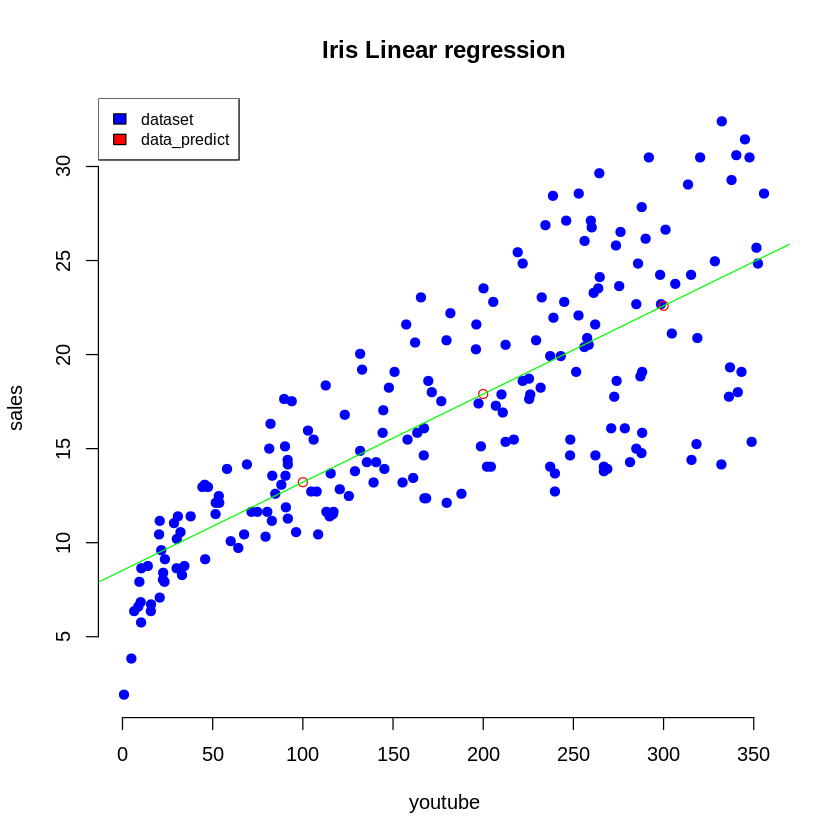

In [ ]:
plot(data_1$youtube, data_1$sales,
      main = 'Iris Linear regression',
      xlab = 'youtube', ylab = 'sales',
      pch = 19, frame = FALSE, col = 'blue')

lines(x,y, col = 'red', type = 'p')
abline (lmMod, data_1, col = 'green')
legend('topleft', c('dataset', 'data_predict'), cex=0.8, fill = c('blue', 'red'))

# 2. Linear Regression (Sales ~ youtube, facebook, newspaper)

## c. Define relationship between Sales ~ youtube, facebook, newspaper

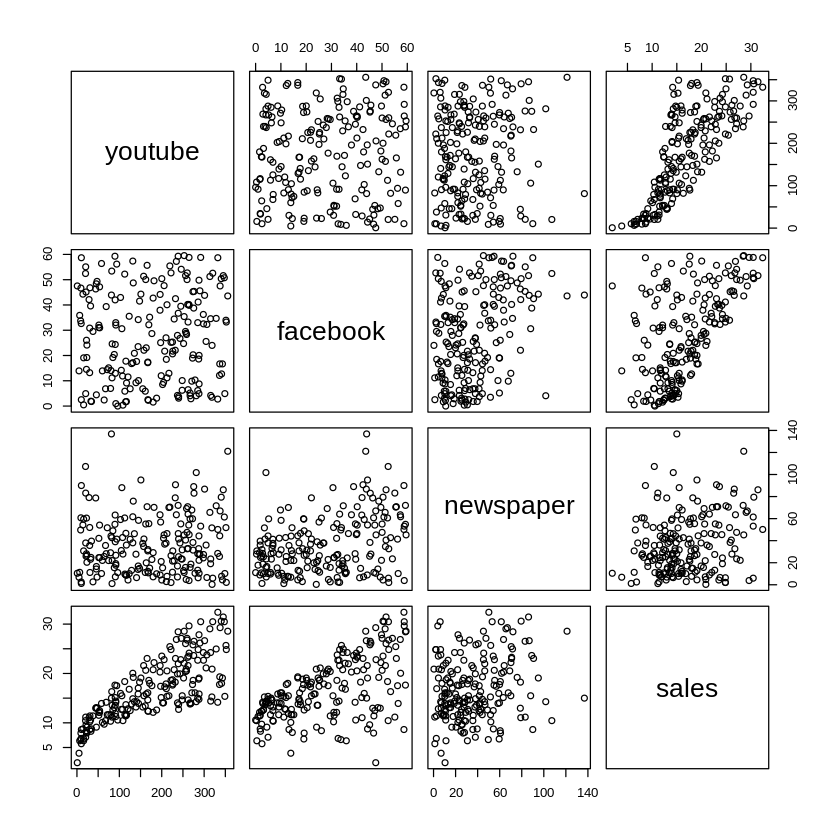

In [ ]:
pairs(~., data = data)

Nhận xét: Mối quan hệ giữa Sales và:
* Youtube: Là tuyến tính rất rõ
* Facebook: Có tuyến tính tương đối
* newspaper: Không có tuyến tính rõ ràng.

In [ ]:
# Tính correlation
print(cor(data))

             youtube   facebook  newspaper     sales
youtube   1.00000000 0.05480866 0.05664787 0.7822244
facebook  0.05480866 1.00000000 0.35410375 0.5762226
newspaper 0.05664787 0.35410375 1.00000000 0.2282990
sales     0.78222442 0.57622257 0.22829903 1.0000000


Nhận xét:

Giữa Youtube & Sales có tương quan dương rõ rệt với cor = 0.78

Giữa facebook & Sales có tương quan dương trung bình với cor = 0.57

Giữa newspaper & Sales có tương quan dương thấp với cor = 0.2

--> Do đó loại biến Newspaper ra khỏi data


Do đó, model lúc này chỉ còn lại các biến Sales ~ Facebook & Youtube

In [ ]:
data_2 = data[,c('youtube','facebook','sales')]

## d. Data preprocessing

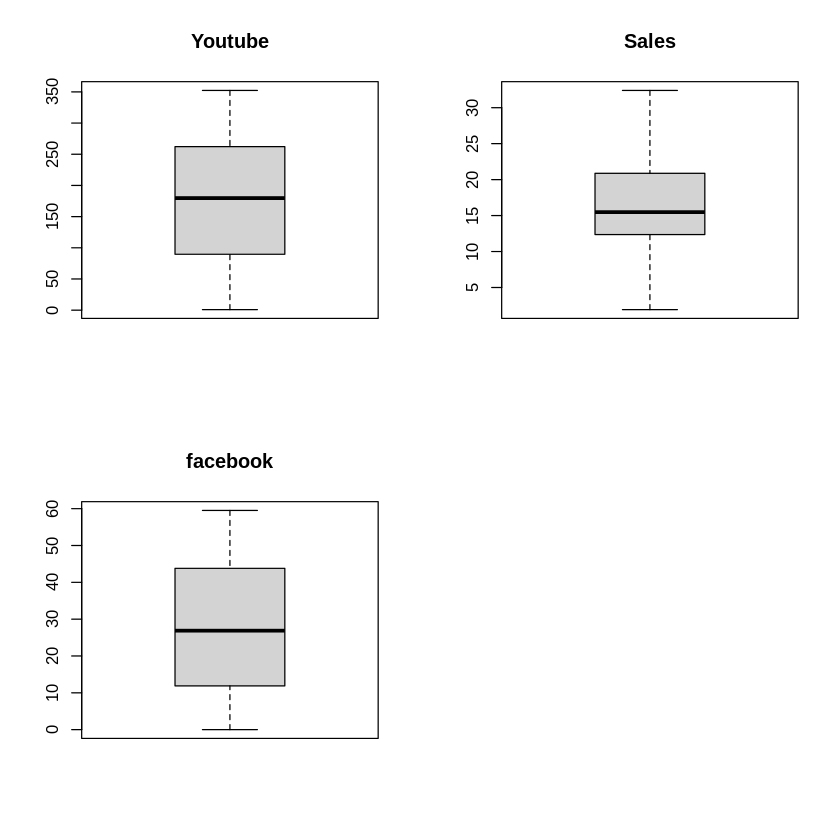

In [ ]:
# Check outlier

par(mfrow = c(2,2)) # vẽ 1 dòng 2 cột
boxplot(data$youtube, main = "Youtube")
boxplot(data$sales, main = "Sales")
boxplot(data$facebook, main = "facebook")

In [ ]:
# check xem có NA data không
sprintf("Total NA of data = %d", sum(is.na(data_2)))

[1] "Total NA of data = 0"

Nhận xét: dữ liệu không có outliers --> phù hợp với Linear Regression

## f. Create Train/test set

In [ ]:
set.seed(42)
trainingRowIndex <- sample(1:nrow(data_2), 0.7*nrow(data_2))
print('Selected trainning row indexes:')
print(trainingRowIndex)

[1] "Selected trainning row indexes:"
  [1]  49  65 153  74 146 122 198 128  47  24  71 100  89 165 110  20 154 114
 [19] 111 131  41 186  27 164 109   5 162  92 104   3  58  42 189 158  43 143
 [37] 150 168 136  36  68 194 174 171   4  99 181   6 134 130 116 169 118   2
 [55] 102 138  40 173  33 103 156  73  76   9  35  16 101  69 157  82 166 113
 [73]  18 179 184 170  55 142  21 187  57 119 139 167 126  91  13  53  54  83
 [91]  32  80  60  29  81 137  85 175 161  72 105 193  38   1 112  78 141 148
[109]  97 133 132 115  87 149  98  25  63 108  14 151 190  88  62  37  31  34
[127]  79  96 196  15 127  86 106  12  64  26 178  95


In [ ]:
# Train data
trainingData = data_2[trainingRowIndex,]
print(nrow(trainingData))

[1] 138


In [ ]:
# Test data
testData = data_2[-trainingRowIndex,]
print(nrow(testData))

[1] 60


## g. Create Linear Regression (train data)

In [ ]:
lmMod_2 <- lm(sales ~ ., data = trainingData) # Model

## h. Summary model

In [ ]:
print(summary(lmMod_2))


Call:
lm(formula = sales ~ ., data = trainingData)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.8773 -1.0840  0.2551  1.3647  3.2109 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.887146   0.410896    9.46   <2e-16 ***
youtube     0.043620   0.001630   26.76   <2e-16 ***
facebook    0.190436   0.009109   20.91   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.925 on 135 degrees of freedom
Multiple R-squared:  0.8988,	Adjusted R-squared:  0.8973 
F-statistic: 599.5 on 2 and 135 DF,  p-value: < 2.2e-16



Nhận xét:
* Residual: cho thấy giá trị sai số giao động từ -6.8 đến 3.2

* Probability đánh giá model:
  3 sao (***): rất tốt

* Std.Error:  Sai số rất nhỏ tầm 0.4 cho Intercept ; 0.001 cho youtube và 0.009 cho facebook

* Residual std error: 1.925  so với mean của sales là 16.8 --> việc dự báo cũng khá chính xác vì có sai số nhỏ.

* R-squared: 0.89 --> model này giải thích được 89% dữ liệu --> model khá tốt.
* p-value khá nhỏ --> model chấp nhận được.

## i. Dự đoán y_test_predict

In [ ]:
y_test_predict <- predict(lmMod_2, testData) # Predict

In [ ]:
# So sánh với y_test
test_df = data.frame(testData$sales, y_test_predict)
colnames(test_df) = c('y_test', 'y_test_predict')

In [ ]:
head(test_df)

,y_test,y_test_predict
,<dbl>,<dbl>
7,14.16,14.392490
8,15.84,14.657978
10,12.72,14.939699
11,10.32,8.672537
18,29.28,27.666337
20,17.52,17.059157


In [ ]:
# mean square error according to model
mse <- mean(lmMod_2$residual^2)
print(paste('mse: ', mse))

# mean square error of testData
mse_test <- mean((testData$sales - y_test_predict)^2)
print(paste('mse in test:', mse_test))

[1] "mse:  3.62392347956881"
[1] "mse in test: 5.18896662492097"


Nhận xét: MSE của train và MSE của test chênh nhau khoảng 1.5 đơn vị --> so với mean của sales là 16.8 thì cho thấy mse khá nhỏ --> model này khá phù hợp và sai số không đáng kể

In [ ]:
# Calculate R-squared for the training data
train_r_squared <- summary(lmMod_2)$r.squared
# Calculate R-squared for the testing data
test_r_squared <- 1 - sum((test_df$y_test - test_df$y_test_predict)^2) / sum((test_df$y_test - mean(test_df$y_test))^2)

# Print the R-squared values
print(paste("Training R-squared:", train_r_squared))
print(paste("Testing R-squared:", test_r_squared))

[1] "Training R-squared: 0.898805720343687"
[1] "Testing R-squared: 0.885035077157469"


Nhận xét: R-squared của train và test cũng tương đối giống nhau, cho thấy rằng model này giải thích dữ liệu ở tập train & test khá tốt & tương đối giống nhau, khoảng 89%

## k. Tìm Coefficients & Intercept

In [ ]:
print(coef(lmMod_2))

m1 = coef(lmMod_2)['youtube']
m2 = coef(lmMod_2)['facebook']
print(paste('youtube:',m1))
print(paste('facebook:',m2))

b = coef(lmMod_2)['(Intercept)']
print(paste('Intercept: ',b))

(Intercept)     youtube    facebook 
 3.88714572  0.04362026  0.19043563 
[1] "youtube: 0.0436202628569871"
[1] "facebook: 0.190435625056747"
[1] "Intercept:  3.88714572370098"
